# PSB injection bump in Xsuite - track!

In [33]:
%matplotlib notebook

In [34]:
# Import modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import xtrack as xt
import xpart as xp
import xdeps as xd

from cpymad.madx import Madx

###  Load line from previous notebook

In [35]:
# Reload
line = xt.Line.from_json('psb_05_thin.json')
line.build_tracker()
tw = line.twiss()

Loading line from dict:   0%|          | 0/2396 [00:00<?, ?it/s]

Done loading line from dict.           
Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `only_xtrack_frozen_energy`.


In [36]:
line.vars['volt_mv_h2'] = 0

### Enable chicane and chicane correction

In [37]:
line.vars['on_chicane_k0'] = 1
line.vars['on_chicane_k2'] = 1
line.vars['on_chicane_beta_corr'] = 1
line.vars['on_chicane_tune_corr'] = 1

### Install monitor at foil

In [38]:
monitor = xt.ParticlesMonitor(start_at_turn=0, stop_at_turn=6000, particle_id_range=(0,50))

line.discard_tracker()
line.insert_element(index='bi1.tstr1l1', element=monitor, name='monitor_at_foil')
line.build_tracker()

Found suitable prebuilt kernel `default_only_xtrack`.


### Generate some test particles

In [39]:
p = xp.generate_matched_gaussian_bunch(num_particles=50, sigma_z=2., nemitt_x=1e-6, nemitt_y=1.5e-6, line=line)

# use the first particle as probe
p.x[0] = 0
p.px[0] = 0
p.y[0] = 0
p.py[0] = 0
p.zeta[0] = 0
p.delta[0] = 0

Found suitable prebuilt kernel `only_xtrack_frozen_energy`.


### Enable time-dependent variables (update `t_turn_s` automatically during tracking)

In [40]:
line.enable_time_dependent_vars = True
line.dt_update_time_dependent_vars = 3e-6
line.vars.cache_active = True

In [41]:
print('Tracking...')
line.track(p, num_turns=6000, time=True)
print(f'Done in {line.time_last_track:.4} s')

Tracking...
Done in 12.94 s


<IPython.core.display.Javascript object>


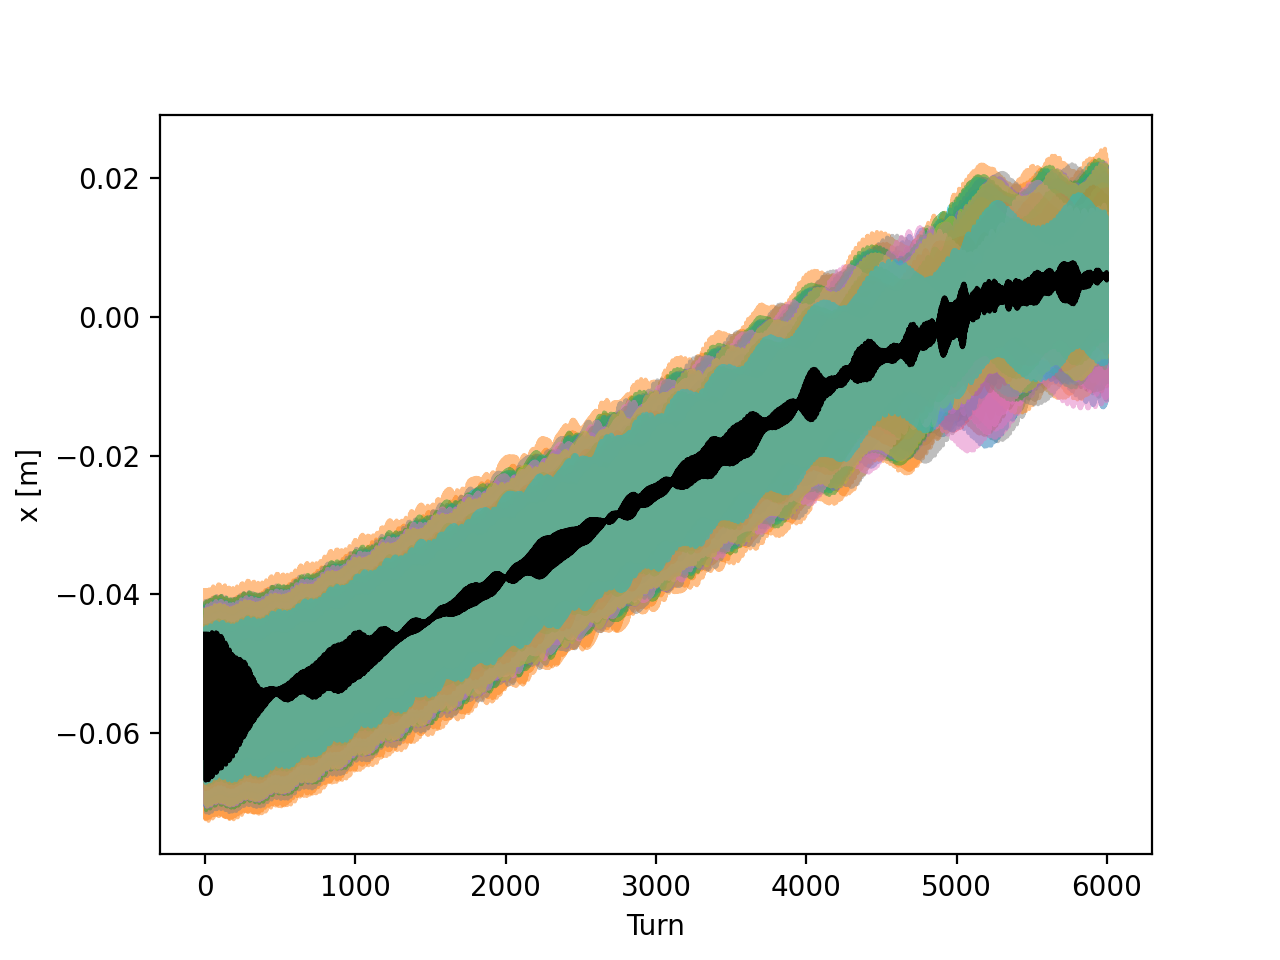

In [44]:
import matplotlib.pyplot as plt
plt.close('all')
plt.figure(1)
plt.plot(monitor.x.T, alpha=0.5)
plt.plot(np.mean(monitor.x, axis=0), color='k')
plt.xlabel('Turn')
plt.ylabel('x [m]')
plt.show()

In [43]:
np.mean(monitor.x, axis=1)

array([-0.02491131, -0.02437982, -0.02443765, -0.02479829, -0.02404914,
       -0.02536483, -0.02522417, -0.0256418 , -0.02491691, -0.02541502,
       -0.0253356 , -0.02534354, -0.02481308, -0.02500932, -0.02522582,
       -0.02439205, -0.02414798, -0.02565369, -0.02497348, -0.02438908,
       -0.02532801, -0.0244909 , -0.02493904, -0.02543542, -0.02481041,
       -0.02436811, -0.0259672 , -0.024363  , -0.02481257, -0.02436329,
       -0.02487937, -0.02478795, -0.02439023, -0.02435793, -0.02448294,
       -0.0256346 , -0.02534595, -0.02494631, -0.02486796, -0.02442035,
       -0.02514077, -0.0250783 , -0.02443226, -0.02481613, -0.02479369,
       -0.02505252, -0.02528606, -0.02447066, -0.02478568, -0.0246653 ])

-------